<a href="https://colab.research.google.com/github/Nayanchand/Movie-Recommendation-System/blob/main/MRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import pandas library
import pandas as pd

# Get the data
column_names = ['user_id','item_id','rating','timestamp']
path = 'https://media.geeksforgeeks.org/wp-content/uploads/file.tsv'
df = pd.read_csv(path, sep='\t',names=column_names)

# Check the head of the data
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [ ]:
# Check out all the movies and their respective IDs
movie_titles = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/Movie_Id_Titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
data = pd.merge(df, movie_titles, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [ ]:
#Calculate mean rating of all movies
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [ ]:
#Calculate the count rating of all the movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [ ]:
#Creating dataframe with 'rating' count values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()


,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Visualization imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

<Axes: >

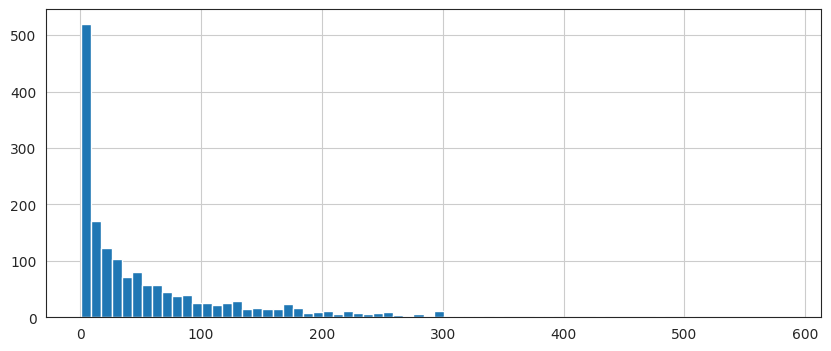

In [ ]:
#plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))

ratings['num of ratings'].hist(bins = 70)

<Axes: >

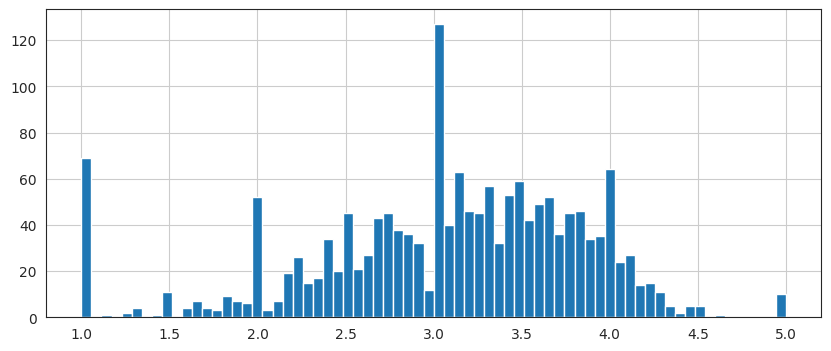

In [ ]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))

ratings['rating'].hist(bins = 70)

In [ ]:
#Sorting values according to the 'num of rating column'
moviemat = data.pivot_table(index = 'user_id', columns ='title', values ='rating')
moviemat.head()
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [ ]:
# analysing correlation with similar movies
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [ ]:
# analysing correlation with similar movies
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)

corr_starwars.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [ ]:
# Similar Movies Like StarWars
corr_starwars.sort_values('Correlation', ascending = False).head(10)
corr_starwars = corr_starwars.join(ratings['num of ratings'])

corr_starwars.head()

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()


,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [ ]:
# Similar movies as of Liarliar
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation'])
corr_liarliar.dropna(inplace = True)

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


Recommendation Based on Emotions

In [ ]:
!pip install beautifulsoup4
!pip install lxml

In [ ]:
from bs4 import BeautifulSoup as SOUP
import re
import requests as HTTP

# Main Function for scraping


def main(emotion):

	# IMDb Url for Drama genre of movie against emotion Sad
	if(emotion == "Sad"):
		urlhere = 'http://www.imdb.com/search/title?genres=drama&title_type=feature&sort=moviemeter, asc'

	# IMDb Url for Musical genre of movie against emotion Disgust
	elif(emotion == "Disgust"):
		urlhere = 'http://www.imdb.com/search/title?genres=musical&title_type=feature&sort=moviemeter, asc'

	# IMDb Url for Family genre of movie against emotion Anger
	elif(emotion == "Anger"):
		urlhere = 'http://www.imdb.com/search/title?genres=family&title_type=feature&sort=moviemeter, asc'

	# IMDb Url for Thriller genre of
	# movie against emotion Anticipation
	elif(emotion == "Anticipation"):
		urlhere = 'http://www.imdb.com/search/title?genres=thriller&title_type=feature&sort=moviemeter, asc'

	# IMDb Url for Sport genre of
	# movie against emotion Fear
	elif(emotion == "Fear"):
		urlhere = 'http://www.imdb.com/search/title?genres=sport&title_type=feature&sort=moviemeter, asc'

	# IMDb Url for Thriller genre of
	# movie against emotion Enjoyment
	elif(emotion == "Enjoyment"):
		urlhere = 'http://www.imdb.com/search/title?genres=thriller&title_type=feature&sort=moviemeter, asc'

	# IMDb Url for Western genre of
	# movie against emotion Trust
	elif(emotion == "Trust"):
		urlhere = 'http://www.imdb.com/search/title?genres=western&title_type=feature&sort=moviemeter, asc'

	# IMDb Url for Film_noir genre of
	# movie against emotion Surprise
	elif(emotion == "Surprise"):
		urlhere = 'http://www.imdb.com/search/title?genres=film_noir&title_type=feature&sort=moviemeter, asc'

	# HTTP request to get the data of
	# the whole page
	response = HTTP.get(urlhere)
	data = response.text

	# Parsing the data using
	# BeautifulSoup
	soup = SOUP(data, "lxml")

	# Extract movie titles from the
	# data using regex
	title = soup.find_all(
		"a", attrs={"href": re.compile(r'\/title\/tt+\d*\/')})
	return title


# Driver Function
if __name__ == '__main__':

	emotion = input("Enter the emotion: ")
	a = main(emotion)
	count = 0

	if(emotion == "Disgust" or emotion == "Anger"
	or emotion == "Surprise"):

		for i in a:

			# Splitting each line of the
			# IMDb data to scrape movies
			tmp = str(i).split('>;')

			if(len(tmp) == 3):
				print(tmp[1][:-3])

			if(count > 13):
				break
			count += 1
	else:
		for i in a:
			tmp = str(i).split('>')

			if(len(tmp) == 3):
				print(tmp[1][:-3])

			if(count > 11):
				break
			count += 1


Enter the emotion: Enjoyment
The Equalizer 3
The Nun II
Jawan
A Haunting in Venice


Recommendation Based on Plot Summary using TF-IDF Vectorizaton and Cosine Similarity

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wiki_movie_plots_deduped.csv to wiki_movie_plots_deduped.csv


In [ ]:
# Give the location of the dataset
#path_dataset =" wiki_movie_plots_deduped.csv"

import pandas as pd
data = pd.read_csv('wiki_movie_plots_deduped.csv')
data.head()


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [ ]:
len(data)

34886

In [ ]:
import numpy as np
np.unique(data['Origin/Ethnicity'])

array(['American', 'Assamese', 'Australian', 'Bangladeshi', 'Bengali',
       'Bollywood', 'British', 'Canadian', 'Chinese', 'Egyptian',
       'Filipino', 'Hong Kong', 'Japanese', 'Kannada', 'Malayalam',
       'Malaysian', 'Maldivian', 'Marathi', 'Punjabi', 'Russian',
       'South_Korean', 'Tamil', 'Telugu', 'Turkish'], dtype=object)

In [ ]:
len(data.loc[data['Origin/Ethnicity']=='American'])

17377

In [ ]:
len(data.loc[data['Origin/Ethnicity']=='British'])

3670

In [ ]:
# Concatenating American and British movies
df1 = pd.DataFrame(data.loc[data['Origin/Ethnicity']=='American'])
df2 = pd.DataFrame(data.loc[data['Origin/Ethnicity']=='British'])
data = pd.concat([df1, df2], ignore_index = True)

In [ ]:
len(data)

21047

In [ ]:
finaldata = data[["Title", "Plot"]]		 # Required columns - Title and movie plot

In [ ]:
finaldata = finaldata.set_index('Title') # Setting the movie title as index

In [ ]:
finaldata.head(10)

,Plot
Title,
Kansas Saloon Smashers,"A bartender is working at a saloon, serving dr..."
Love by the Light of the Moon,"The moon, painted with a smiling face hangs ov..."
The Martyred Presidents,"The film, just over a minute long, is composed..."
"Terrible Teddy, the Grizzly King",Lasting just 61 seconds and consisting of two ...
Jack and the Beanstalk,The earliest known adaptation of the classic f...
Alice in Wonderland,"Alice follows a large white rabbit down a ""Rab..."
The Great Train Robbery,The film opens with two bandits breaking into ...
The Suburbanite,The film is about a family who move to the sub...
The Little Train Robbery,The opening scene shows the interior of the ro...


In [ ]:
finaldata["Plot"][0]

"A bartender is working at a saloon, serving drinks to customers. After he fills a stereotypically Irish man's bucket with beer, Carrie Nation and her followers burst inside. They assault the Irish man, pulling his hat over his eyes and then dumping the beer over his head. The group then begin wrecking the bar, smashing the fixtures, mirrors, and breaking the cash register. The bartender then sprays seltzer water in Nation's face before a group of policemen appear and order everybody to leave.[1]"

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

VERB_CODES = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_sentences(text):
	text = text.lower()
	temp_sent =[]
	words = nltk.word_tokenize(text)
	tags = nltk.pos_tag(words)

	for i, word in enumerate(words):
		if tags[i][1] in VERB_CODES:
			lemmatized = lemmatizer.lemmatize(word, 'v')
		else:
			lemmatized = lemmatizer.lemmatize(word)
		if lemmatized not in stop_words and lemmatized.isalpha():
			temp_sent.append(lemmatized)

			finalsent = ' '.join(temp_sent)
			finalsent = finalsent.replace("n't", " not")
			finalsent = finalsent.replace("'m", " am")
			finalsent = finalsent.replace("'s", " is")
			finalsent = finalsent.replace("'re", " are")
			finalsent = finalsent.replace("'ll", " will")
			finalsent = finalsent.replace("'ve", " have")
			finalsent = finalsent.replace("'d", " would")
			return finalsent

finaldata["plot_processed"]= finaldata["Plot"].apply(preprocess_sentences)
finaldata.head()



,Plot,plot_processed
Title,,
Kansas Saloon Smashers,"A bartender is working at a saloon, serving dr...",bartender
Love by the Light of the Moon,"The moon, painted with a smiling face hangs ov...",moon
The Martyred Presidents,"The film, just over a minute long, is composed...",film
"Terrible Teddy, the Grizzly King",Lasting just 61 seconds and consisting of two ...,last
Jack and the Beanstalk,The earliest known adaptation of the classic f...,earliest


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing pre-processed movie plots using TF-IDF
tfidfvec = TfidfVectorizer()
tfidf_movieid = tfidfvec.fit_transform((finaldata["plot_processed"]))

# Finding cosine similarity between vectors
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_movieid, tfidf_movieid)


In [ ]:
# Storing indices of the data
indices = pd.Series(finaldata.index)

def recommendations(title, cosine_sim = cos_sim):
	recommended_movies = []
	index = indices[indices == title].index[0]
	similarity_scores = pd.Series(cosine_sim[index]).sort_values(ascending = False)
	top_10_movies = list(similarity_scores.iloc[1:11].index)
	for i in top_10_movies:
		recommended_movies.append(list(finaldata.index)[i])
	return recommended_movies


In [ ]:
recommendations("Harry Potter and the Chamber of Secrets")


['Six Ways to Sunday',
 'The Spikes Gang',
 'The Hired Hand',
 '...All the Marbles',
 'H. M. Pulham, Esq.',
 'Candleshoe',
 'Twice in a Lifetime',
 "Idiot's Delight",
 'Dumb and Dumberer: When Harry Met Lloyd',
 'The Last Run']

In [ ]:
recommendations("Ice Age")


['Kansas Saloon Smashers',
 'The Crocodile Hunter: Collision Course',
 ' The Dancer Upstairs',
 'Cypher',
 'Crossroads',
 'Crazy as Hell',
 'The Country Bears',
 'The Count of Monte Cristo',
 'Confessions of a Dangerous Mind',
 'Collateral Damage']

In [ ]:
recommendations("Blackmail")


['ID',
 'Hot Rod Gang',
 'The Brothers Solomon',
 "Let's Go to Prison",
 'All the Money in the World',
 'Ted 2',
 'Life for Ruth',
 'Just Imagine',
 'Birthday Girl',
 'Lonely Are the Brave']